In [110]:
#importing the necessary libraries for this project
import pandas as pd
import datetime
import requests

# If you haven't done so previously you will need to install mplfinance

#!pip install mplfinance 
import mplfinance as mpf
import yfinance as yf
import numpy as np
import pytz
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os
import json

import warnings
warnings.filterwarnings("ignore", message="No frequency information was provided*")


In [111]:
import os 

from binance.client import Client

api_key = os.environ.get('BINANCE_API_KEY')
api_key_secret = os.environ.get('Binance_API_KEY_SECRET')


client = Client(api_key, api_key_secret, testnet=True)
cline = Client(api_key, api_key_secret, tld='us')

In [112]:
tickers = client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.05352000'},
 {'symbol': 'LTCBTC', 'price': '0.00189500'},
 {'symbol': 'BNBBTC', 'price': '0.00661600'},
 {'symbol': 'BTCUSDT', 'price': '36956.62000000'},
 {'symbol': 'ETHUSDT', 'price': '1977.90000000'},
 {'symbol': 'TRXBTC', 'price': '0.00000277'},
 {'symbol': 'XRPBTC', 'price': '0.00001683'},
 {'symbol': 'BNBUSDT', 'price': '244.60000000'},
 {'symbol': 'LTCUSDT', 'price': '70.01000000'},
 {'symbol': 'LTCBNB', 'price': '0.28600000'},
 {'symbol': 'XRPUSDT', 'price': '0.62190000'},
 {'symbol': 'XRPBNB', 'price': '0.00254500'},
 {'symbol': 'TRXBNB', 'price': '0.00042070'},
 {'symbol': 'TRXUSDT', 'price': '0.10289000'},
 {'symbol': 'BNBBUSD', 'price': '244.60000000'},
 {'symbol': 'BTCBUSD', 'price': '36968.24000000'},
 {'symbol': 'XRPBUSD', 'price': '0.62210000'},
 {'symbol': 'ETHBUSD', 'price': '1978.25000000'},
 {'symbol': 'LTCBUSD', 'price': '70.07000000'},
 {'symbol': 'TRXBUSD', 'price': '0.07727000'},
 {'symbol': 'NEOBTC', 'price': '0.00030220'},
 {

In [113]:
marketdepth = client.get_order_book(symbol='BTCUSDT')
marketdepth

{'lastUpdateId': 9517366,
 'bids': [['36954.05000000', '0.01083000'],
  ['36954.00000000', '0.01245000'],
  ['36953.80000000', '0.01259000'],
  ['36953.77000000', '0.00921000'],
  ['36953.72000000', '0.00826000'],
  ['36953.66000000', '0.00961000'],
  ['36953.04000000', '0.01069000'],
  ['36952.81000000', '0.01124000'],
  ['36952.71000000', '0.00691000'],
  ['36952.63000000', '0.00799000'],
  ['36951.00000000', '0.00100000'],
  ['36950.89000000', '0.00100000'],
  ['36949.52000000', '0.01178000'],
  ['36949.01000000', '0.00731000'],
  ['36948.51000000', '0.01191000'],
  ['36947.31000000', '0.00100000'],
  ['36943.62000000', '0.00100000'],
  ['36943.51000000', '0.00826000'],
  ['36942.52000000', '0.01313000'],
  ['36942.04000000', '0.01043000'],
  ['36941.54000000', '0.00853000'],
  ['36939.93000000', '0.00100000'],
  ['36936.24000000', '0.00100000'],
  ['36932.55000000', '0.00100000'],
  ['36928.86000000', '0.00100000'],
  ['36925.17000000', '0.00100000'],
  ['36921.48000000', '0.001000

In [114]:
coin_info = client.get_all_tickers()
df= pd.DataFrame(coin_info)
btc_df = df[df['symbol'] == 'BTCUSDT']
print(btc_df)


    symbol           price
3  BTCUSDT  36956.62000000


In [115]:
exchange_info = client.get_exchange_info()
exchange_info.keys()

dict_keys(['timezone', 'serverTime', 'rateLimits', 'exchangeFilters', 'symbols'])

In [116]:
df = pd.DataFrame(exchange_info['symbols'], )
df

,symbol,status,baseAsset,baseAssetPrecision,quoteAsset,quotePrecision,quoteAssetPrecision,baseCommissionPrecision,quoteCommissionPrecision,orderTypes,...,ocoAllowed,quoteOrderQtyMarketAllowed,allowTrailingStop,cancelReplaceAllowed,isSpotTradingAllowed,isMarginTradingAllowed,filters,permissions,defaultSelfTradePreventionMode,allowedSelfTradePreventionModes
0,ETHBTC,TRADING,ETH,8,BTC,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",...,True,True,True,True,True,False,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...",[SPOT],NONE,"[NONE, EXPIRE_TAKER, EXPIRE_MAKER, EXPIRE_BOTH]"
1,LTCBTC,TRADING,LTC,8,BTC,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",...,True,True,True,True,True,False,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...",[SPOT],NONE,"[NONE, EXPIRE_TAKER, EXPIRE_MAKER, EXPIRE_BOTH]"
2,BNBBTC,TRADING,BNB,8,BTC,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",...,True,True,True,True,True,False,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...",[SPOT],NONE,"[NONE, EXPIRE_TAKER, EXPIRE_MAKER, EXPIRE_BOTH]"
3,BTCUSDT,TRADING,BTC,8,USDT,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",...,True,True,True,True,True,False,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...",[SPOT],NONE,"[NONE, EXPIRE_TAKER, EXPIRE_MAKER, EXPIRE_BOTH]"
4,ETHUSDT,TRADING,ETH,8,USDT,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",...,True,True,True,True,True,False,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...",[SPOT],NONE,"[NONE, EXPIRE_TAKER, EXPIRE_MAKER, EXPIRE_BOTH]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,NEARFDUSD,TRADING,NEAR,8,FDUSD,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",...,True,True,True,True,True,False,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...",[SPOT],NONE,"[NONE, EXPIRE_TAKER, EXPIRE_MAKER, EXPIRE_BOTH]"
1209,STRAXTRY,TRADING,STRAX,8,TRY,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",...,True,True,True,True,True,False,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...",[SPOT],NONE,"[NONE, EXPIRE_TAKER, EXPIRE_MAKER, EXPIRE_BOTH]"
1210,TIABTC,TRADING,TIA,8,BTC,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",...,True,True,True,True,True,False,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...",[SPOT],NONE,"[NONE, EXPIRE_TAKER, EXPIRE_MAKER, EXPIRE_BOTH]"
1211,TIAUSDT,TRADING,TIA,8,USDT,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",...,True,True,True,True,True,False,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...",[SPOT],NONE,"[NONE, EXPIRE_TAKER, EXPIRE_MAKER, EXPIRE_BOTH]"


In [117]:
recent_trades = client.get_recent_trades(symbol='BTCUSDT')
df = pd.DataFrame(recent_trades)
df.head()

,id,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
0,1148228,36951.00000000,0.00100000,36.95100000,1700433133868,False,True
1,1148229,36954.00000000,0.00983000,363.25782000,1700433133868,False,True
2,1148230,36954.00000000,0.00086000,31.78044000,1700433133874,False,True
3,1148231,36954.47000000,0.00956000,353.28473320,1700433133874,False,True
4,1148232,36954.70000000,0.00100000,36.95470000,1700433134918,False,True


In [118]:
id = df.loc[300, 'id']
history_trades = client.get_historical_trades(symbol='BTCUSDT', limit=1000, fromId = id)
df = pd.DataFrame(history_trades)
df

,id,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
0,1148528,36951.00000000,0.00307000,113.43957000,1700433890096,False,True
1,1148529,36951.14000000,0.00100000,36.95114000,1700433890096,False,True
2,1148530,36954.06000000,0.01000000,369.54060000,1700433900292,False,True
3,1148531,36954.06000000,0.00135000,49.88798100,1700433900456,False,True
4,1148532,36954.06000000,0.00046000,16.99886760,1700433923670,True,True
...,...,...,...,...,...,...,...
195,1148723,36954.08000000,0.00046000,16.99887680,1700434443021,False,True
196,1148724,36954.09000000,0.00159000,58.75700310,1700434443021,False,True
197,1148725,36956.01000000,0.00569000,210.27969690,1700434443021,False,True
198,1148726,36956.38000000,0.00019000,7.02171220,1700434443021,False,True


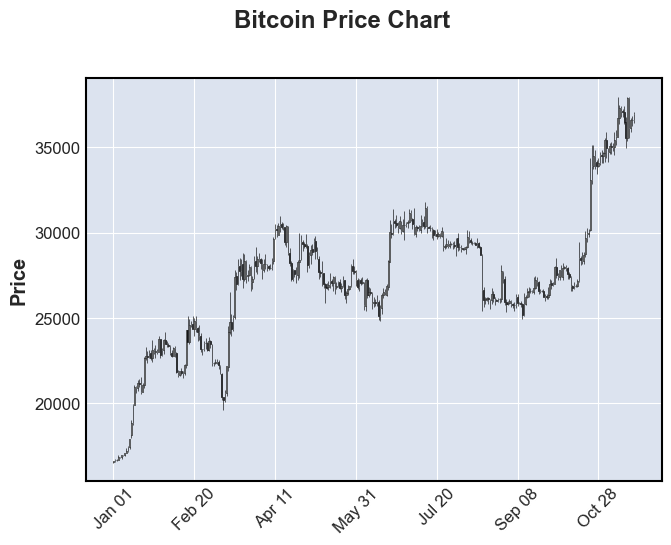

In [119]:
ticker_symbol = "BTC-USD"

bitcoin_ticker = yf.Ticker(ticker_symbol)
bitcoin_data = bitcoin_ticker.history(period="max")
bitcoin_data = bitcoin_data['2023-01-01':]

bitcoin_data.to_csv("bitcoin_price_data.csv")
    
mpf.plot(bitcoin_data, type='candle', title="Bitcoin Price Chart")


In [120]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the CSV data
df = pd.read_csv('bitcoin_price_data.csv')

# Rename the columns
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

# Convert 'ds' to datetime
df['ds'] = pd.to_datetime(df['ds'])

# Set 'ds' as the index
df.set_index('ds', inplace=True)

# Ensure data is sorted by date (in case it's not sorted)
df = df.sort_index()

# Split the data into training and test sets
train_data = df.iloc[:-50]  # Using all data except the last 50 points for training
test_data = df.iloc[-50:]   # Last 50 points for testing

# Fit an ARIMA model on the training data
model = ARIMA(train_data['y'], order=(5, 1, 0))  # Adjust order as needed
results = model.fit()

# Forecast the next x days using the trained model
forecast_steps = 50
forecast = results.get_forecast(steps=forecast_steps)

# Get the predicted values and confidence intervals for the test period
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Print the predicted values and confidence intervals for the test period
forecast_dates = pd.date_range(start=test_data.index[0], periods=forecast_steps)
forecast_df = pd.DataFrame({'ds': forecast_dates, 'yhat': predicted_values})
print(forecast_df)

                                                 ds          yhat
2023-10-01 00:00:00+00:00 2023-10-01 00:00:00+00:00  26984.434446
2023-10-02 00:00:00+00:00 2023-10-02 00:00:00+00:00  26987.596864
2023-10-03 00:00:00+00:00 2023-10-03 00:00:00+00:00  26987.596308
2023-10-04 00:00:00+00:00 2023-10-04 00:00:00+00:00  26989.192377
2023-10-05 00:00:00+00:00 2023-10-05 00:00:00+00:00  26989.147937
2023-10-06 00:00:00+00:00 2023-10-06 00:00:00+00:00  26989.221382
2023-10-07 00:00:00+00:00 2023-10-07 00:00:00+00:00  26989.262560
2023-10-08 00:00:00+00:00 2023-10-08 00:00:00+00:00  26989.274564
2023-10-09 00:00:00+00:00 2023-10-09 00:00:00+00:00  26989.273548
2023-10-10 00:00:00+00:00 2023-10-10 00:00:00+00:00  26989.276562
2023-10-11 00:00:00+00:00 2023-10-11 00:00:00+00:00  26989.276804
2023-10-12 00:00:00+00:00 2023-10-12 00:00:00+00:00  26989.276892
2023-10-13 00:00:00+00:00 2023-10-13 00:00:00+00:00  26989.276966
2023-10-14 00:00:00+00:00 2023-10-14 00:00:00+00:00  26989.277001
2023-10-15

In [121]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the CSV data
df = pd.read_csv('bitcoin_price_data.csv')

# Rename the columns
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

# Convert 'ds' to datetime
df['ds'] = pd.to_datetime(df['ds'])

# Set 'ds' as the index
df.set_index('ds', inplace=True)

# Ensure data is sorted by date (in case it's not sorted)
df = df.sort_index()

# Define the training data
train_data = df.iloc[:-50]  # Using all data except the last 50 points for training

# Assuming you have already trained your ARIMA model and stored it in 'results'

# Forecast the next x days using the trained model
forecast_steps = 50
forecast = results.get_forecast(steps=forecast_steps)

# Get the predicted values and confidence intervals for the future period
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a date range for the forecasted dates
forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1)[1:]

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'ds': forecast_dates, 'yhat': predicted_values})

# Print the forecasted values
print(forecast_df)

                                                 ds          yhat
2023-10-01 00:00:00+00:00 2023-11-20 00:00:00+00:00  26984.434446
2023-10-02 00:00:00+00:00 2023-11-21 00:00:00+00:00  26987.596864
2023-10-03 00:00:00+00:00 2023-11-22 00:00:00+00:00  26987.596308
2023-10-04 00:00:00+00:00 2023-11-23 00:00:00+00:00  26989.192377
2023-10-05 00:00:00+00:00 2023-11-24 00:00:00+00:00  26989.147937
2023-10-06 00:00:00+00:00 2023-11-25 00:00:00+00:00  26989.221382
2023-10-07 00:00:00+00:00 2023-11-26 00:00:00+00:00  26989.262560
2023-10-08 00:00:00+00:00 2023-11-27 00:00:00+00:00  26989.274564
2023-10-09 00:00:00+00:00 2023-11-28 00:00:00+00:00  26989.273548
2023-10-10 00:00:00+00:00 2023-11-29 00:00:00+00:00  26989.276562
2023-10-11 00:00:00+00:00 2023-11-30 00:00:00+00:00  26989.276804
2023-10-12 00:00:00+00:00 2023-12-01 00:00:00+00:00  26989.276892
2023-10-13 00:00:00+00:00 2023-12-02 00:00:00+00:00  26989.276966
2023-10-14 00:00:00+00:00 2023-12-03 00:00:00+00:00  26989.277001
2023-10-15

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools

# Load the CSV data
df = pd.read_csv('bitcoin_price_data.csv')

# Rename the columns
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

# Convert 'ds' to datetime
df['ds'] = pd.to_datetime(df['ds'])

# Set 'ds' as the index
df.set_index('ds', inplace=True)

# Ensure data is sorted by date (in case it's not sorted)
df = df.sort_index()

# Define the training and testing periods
train_data = df.iloc[:-5]  # Using all data except the last 5 points for training
test_data = df.iloc[-5:]   # Last 5 points for testing

best_rmse = float('inf')
best_order = None

# Hyperparameter tuning with reduced ranges
for p, d, q in itertools.product(range(3), repeat=3):  
    for P, D, Q, s in itertools.product(range(3), repeat=4):  
        param = (p, d, q, P, D, Q, s)
        try:
            model = SARIMAX(train_data['y'], order=(p, d, q), seasonal_order=(P, D, Q, s))
            results = model.fit()
            forecast = results.get_forecast(steps=len(test_data))
            predicted_values = forecast.predicted_mean
            rmse = mean_squared_error(test_data['y'], predicted_values)**0.5

            if rmse < best_rmse:
                best_rmse = rmse
                best_order = param

        except Exception as e:
            print(f"Error for {param}: {e}")
            continue

# Train the model with the best parameters
model = SARIMAX(train_data['y'], order=best_order[:3], seasonal_order=best_order[3:])
results = model.fit()

# Forecast the next x days using the trained model
forecast_steps = 10
forecast = results.get_forecast(steps=forecast_steps)

# Get the predicted values and confidence intervals for the test period
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a date range for the forecasted dates
forecast_dates = pd.date_range(start=test_data.index[0], periods=forecast_steps)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'ds': forecast_dates, 'yhat': predicted_values})

# Plot the forecast and confidence intervals along with the actual test data



Error for (0, 0, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 0, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (0, 0, 0, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (0, 0, 0, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (0, 0, 0, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn(

Error for (0, 0, 1, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting p

Error for (0, 0, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 0, 1, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting p

Error for (0, 0, 1, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (0, 0, 1, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 0, 1, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 0, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 0, 1, 1, 0): Mus

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnin

Error for (0, 0, 2, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 2, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 1, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 2, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (0, 0, 2, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 2, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 2, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 2, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 0, 2, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 2, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 0, 0, 2, 0): Mus

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 1, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 1, 0, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 1, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 1, 1, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 1, 1, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 1, 2, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 2, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 2, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 2, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 2, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 2, 1, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 2, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 2, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 2, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 1, 2, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 2, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 2, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 2, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 2, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 2, 2, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 2, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 2, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 2, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 1, 2, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 2, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 2, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 2, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 2, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 2, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 0, 0, 2, 0): Mus

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 2, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 2, 0, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 2, 1, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 2, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 2, 1, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 2, 1, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 2, 1, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 2, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 2, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 2, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 2, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 2, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 2, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 2, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 2, 2, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 2, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 2, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 2, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 1, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 2, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 2, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 2, 2, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 2, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 2, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 2, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 0, 0, 2, 0): Mus

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting sea

Error for (1, 0, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autore

Error for (1, 0, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (1, 0, 0, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using ze

Error for (1, 0, 0, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 0, 0, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 0, 0, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting sea

Error for (1, 0, 1, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 0, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using ze

Error for (1, 0, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (1, 0, 1, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (1, 0, 1, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (1, 0, 1, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 2, 1, 2, 2): LU decomposition error.
Error for (1, 0, 1, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 2

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (1, 0, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 0, 1, 1, 0): Mus

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 0, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (1, 0, 2, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 2, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 1, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 2, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (1, 0, 2, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 2, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 2, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 2, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 0, 2, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 2, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 0, 0, 2, 0): Mus

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 1, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 1, 0, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 1, 0, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 1, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 1, 1, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 1, 1, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 1, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 2, 0, 1, 1, 0): Mus

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 1, 2, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 2, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 2, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 2, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 2, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 2, 2, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 2, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 2, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 1, 2, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 2, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 2, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 2, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 2, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 2, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 0, 0, 2, 0): Mus

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 2, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 0, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 0, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 0, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 0, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 0, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 0, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 1, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 2, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 1, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 1, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 2, 1, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 1, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 1, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 2, 1, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 2, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 2, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 2, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 2, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 1, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 2, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 2, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 2, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 2, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 2, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 2, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 2, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting sea

Error for (2, 0, 0, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 0, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (2, 0, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. 

Error for (2, 0, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (2, 0, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 0, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 0, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 0, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 2, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 2, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 2, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 2, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 2, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 2, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 2, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (2, 1, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 1, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 1, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (2, 1, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 1, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 1, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 1, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 2, 0, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 0, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (2, 2, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 2, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 2, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 2, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (2, 2, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (2, 2, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 2, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 2, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 2, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 2, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 2, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 2, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

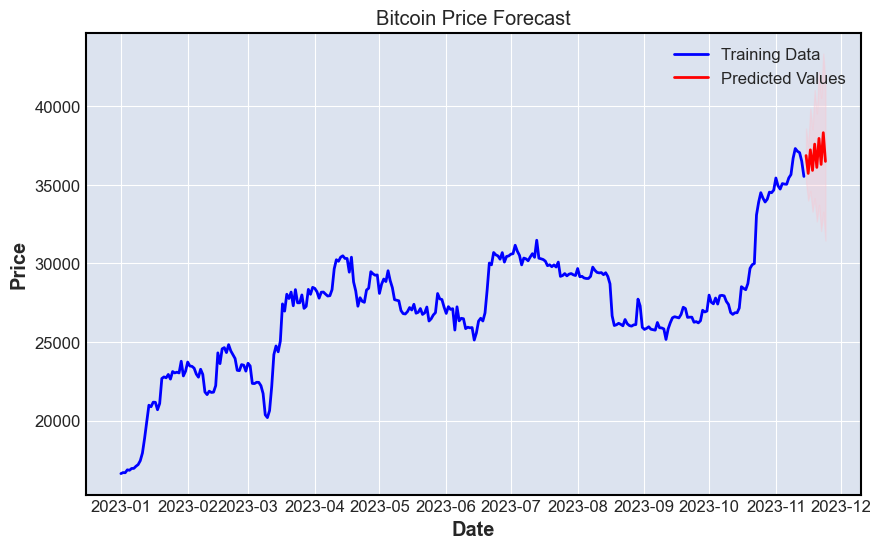

Best RMSE: 702.1085651189939
Best Order: (0, 0, 0, 0, 2, 1, 2)


In [124]:
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['y'], label='Training Data', color='blue')
plt.plot(forecast_df['ds'], forecast_df['yhat'], label='Predicted Values', color='red')
plt.fill_between(forecast_df['ds'], confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Bitcoin Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print(f"Best RMSE: {best_rmse}")
print(f"Best Order: {best_order}")